# 빈도분석 및 워드클라우드 최종 실습

## 1. 라이브러리 로드

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from konlpy.tag import Okt
okt = Okt()

## 2. 데이터 불러오기

In [7]:
# 데이터 경로 알맞게 넣고, index_col을 조정하기
df = pd.read_excel('더배트맨영화리뷰.xlsx', index_col=0)
df

,영화 리뷰,영화 평점
0,개인적으로 예전 다크나이트가 그리웠습니다.이전 다크나이트의 특유의 분위기와 카리스마...,7
1,저는 개인적으로 너무 재미없게 봤어요 ㅠㅠ 계속 지루…다크나이트는 길어도 재밌게봤는...,1
2,노잼은 아닌데 다크나이트처럼 엄청 재밌지는 않음,8
3,제발 좀 빨리빨리 움직여라 말도 좀 빨리빨리하고 아오 속 터진다 진짜,1
4,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
...,...,...
2849,정말 많이 재미가 없네요,1
2850,"철학을 드러내기 보단 도시의 야경, 엔진소리, 파열음, 어둠, 음습함 같은 감각을 ...",8
2851,역사상 가장 아름다운 배트맨,8
2852,진짜 다크나이트에 견줄정도로 굿굿 ㅋㅋㅋ 3시간금방감 ㅋㅋ,10


In [5]:
import os

In [6]:
print(os.getcwd())

C:\Users\toryc\[Textming 2022]\Dataset


In [6]:
################### 결과 예시 ################### 

,영화 리뷰,영화 평점
0,개인적으로 예전 다크나이트가 그리웠습니다.이전 다크나이트의 특유의 분위기와 카리스마...,7
1,저는 개인적으로 너무 재미없게 봤어요 ㅠㅠ 계속 지루…다크나이트는 길어도 재밌게봤는...,1
2,노잼은 아닌데 다크나이트처럼 엄청 재밌지는 않음,8
3,제발 좀 빨리빨리 움직여라 말도 좀 빨리빨리하고 아오 속 터진다 진짜,1
4,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
...,...,...
2849,정말 많이 재미가 없네요,1
2850,"철학을 드러내기 보단 도시의 야경, 엔진소리, 파열음, 어둠, 음습함 같은 감각을 ...",8
2851,역사상 가장 아름다운 배트맨,8
2852,진짜 다크나이트에 견줄정도로 굿굿 ㅋㅋㅋ 3시간금방감 ㅋㅋ,10


## 3. 데이터 전처리

In [ ]:
## '영화 리뷰' 가 비어 있는 데이터가 있는지 확인하기. isnull() 사용하기

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854 entries, 0 to 2853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화 리뷰   2851 non-null   object
 1   영화 평점   2854 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.9+ KB


In [14]:
df[df['영화 리뷰'].isnull()]

,영화 리뷰,영화 평점
1191,NaN,10
2327,NaN,10
2780,NaN,10


In [7]:
################### 결과 예시 ################### 

,영화 리뷰,영화 평점
1191,NaN,10
2327,NaN,10
2780,NaN,10


In [17]:
## dropna을 활용하여 해당 데이터 지우기
df.dropna(inplace=True)

In [20]:
## reset_index()를 활용하여 인덱스 재설정해주기
df.reset_index(inplace=True, drop=True)

In [21]:
################### 결과 예시 ################### 

### 확인할 것
## 1. 총 데이터의 개수가 2851개로 3개의 NULL 데이터가 제거됨을 확인
## 2. 인덱스를 재설정 했음으로 마지막 데이터의 인덱스는 2850번 
###################################################

df

,영화 리뷰,영화 평점
0,개인적으로 예전 다크나이트가 그리웠습니다.이전 다크나이트의 특유의 분위기와 카리스마...,7
1,저는 개인적으로 너무 재미없게 봤어요 ㅠㅠ 계속 지루…다크나이트는 길어도 재밌게봤는...,1
2,노잼은 아닌데 다크나이트처럼 엄청 재밌지는 않음,8
3,제발 좀 빨리빨리 움직여라 말도 좀 빨리빨리하고 아오 속 터진다 진짜,1
4,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
...,...,...
2846,정말 많이 재미가 없네요,1
2847,"철학을 드러내기 보단 도시의 야경, 엔진소리, 파열음, 어둠, 음습함 같은 감각을 ...",8
2848,역사상 가장 아름다운 배트맨,8
2849,진짜 다크나이트에 견줄정도로 굿굿 ㅋㅋㅋ 3시간금방감 ㅋㅋ,10


## 4. 형태소분석

In [22]:
# okt.nouns()를 활용하여 첫번째 데이터의 명사만 추출해보기

from konlpy.tag import Okt

In [23]:
okt = Okt()

In [25]:
df['영화 리뷰'].loc[0]

'개인적으로 예전 다크나이트가 그리웠습니다.이전 다크나이트의 특유의 분위기와 카리스마가 너무 잘 만들어졌던 터라 비교가 되서 더 그렇지 않나 싶네요. 그리고 모든 배트맨의 액션은 너무 주먹다짐 느낌이라 뭔가 압도적 강함이 결여된 느낌입니다. '

In [24]:
okt.nouns(df['영화 리뷰'].loc[0])

['개인',
 '예전',
 '다크나이트',
 '이전',
 '다크나이트',
 '특유',
 '분위기',
 '카리스마',
 '터',
 '비교',
 '더',
 '모든',
 '배트맨',
 '액션',
 '주먹다짐',
 '느낌',
 '뭔가',
 '압도',
 '결여',
 '느낌']

In [10]:
################### 결과 예시 ################### 

['개인',
 '예전',
 '다크나이트',
 '이전',
 '다크나이트',
 '특유',
 '분위기',
 '카리스마',
 '터',
 '비교',
 '더',
 '모든',
 '배트맨',
 '액션',
 '주먹다짐',
 '느낌',
 '뭔가',
 '압도',
 '결여',
 '느낌']

In [26]:
# 영화 리뷰 전체를 okt.nouns를 활용하여 명사만 추출하고 noun_list에 담기
noun_list = []
for i in range(len(df)):
    noun_list.append(okt.nouns(df['영화 리뷰'].loc[i])) 

In [27]:
noun_list[:3]

[['개인',
  '예전',
  '다크나이트',
  '이전',
  '다크나이트',
  '특유',
  '분위기',
  '카리스마',
  '터',
  '비교',
  '더',
  '모든',
  '배트맨',
  '액션',
  '주먹다짐',
  '느낌',
  '뭔가',
  '압도',
  '결여',
  '느낌'],
 ['저', '개인', '계속', '지루', '다크나이트', '이건', '흥미진진', '게', '테'],
 ['노잼', '다크나이트']]

In [28]:
# 명사가 추출된 모든 데이터를 하나로 total_word에 담기
total_word = []
for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        total_word.append(noun_list[i][j])

In [29]:
total_word[:10]

['개인', '예전', '다크나이트', '이전', '다크나이트', '특유', '분위기', '카리스마', '터', '비교']

In [30]:
len(total_word)

32321

In [34]:
# collections.Counter()를 활용하여 total_word의 단어 개수를 세고, 가장 많이 나온 단어 10개만 추출하기.
import collections
counter = collections.Counter(total_word)
counter.most_common(10)

[('배트맨', 1666),
 ('영화', 1157),
 ('더', 300),
 ('액션', 286),
 ('생각', 286),
 ('히어로', 270),
 ('스토리', 261),
 ('분위기', 258),
 ('다크나이트', 250),
 ('진짜', 242)]

In [13]:
################### 결과 예시 ################### 

[('배트맨', 1666),
 ('영화', 1157),
 ('더', 300),
 ('액션', 286),
 ('생각', 286),
 ('히어로', 270),
 ('스토리', 261),
 ('분위기', 258),
 ('다크나이트', 250),
 ('진짜', 242)]

## 5. 워드클라우드 시각화

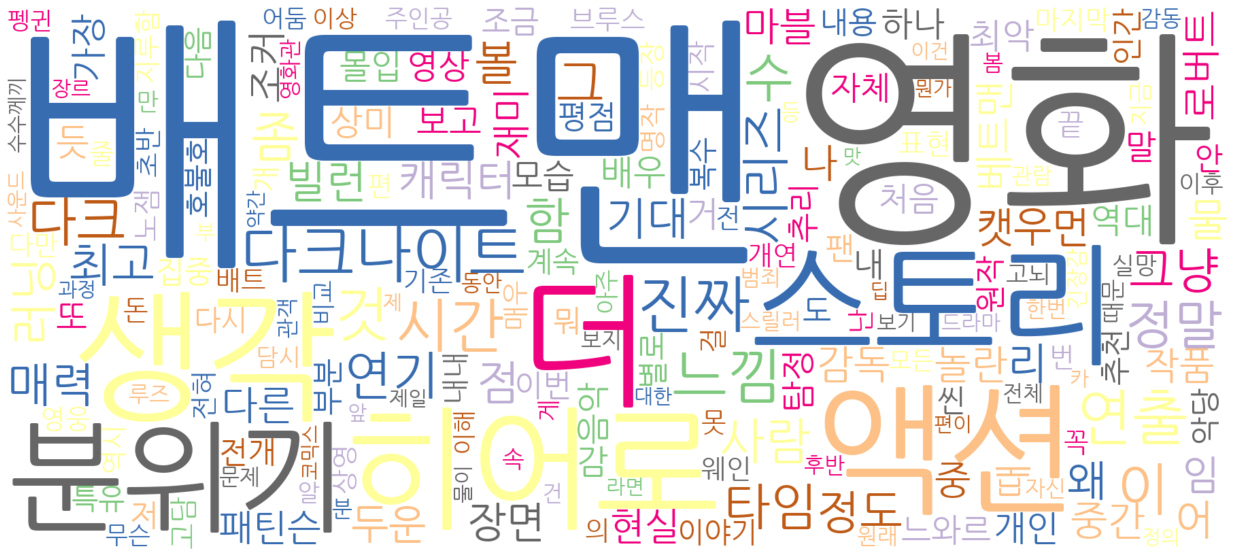

In [37]:
# 워드 클라우드를 활용하여 시각화

from wordcloud import WordCloud
wordcloud = WordCloud(
    font_path = "C:/Users/toryc/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf",
    background_color='white',# 배경 색깔 정하기
    colormap = 'Accent',   # 폰트 색깔 정하기 [위:colormap 참조]
    width = 1800, # sad
    height = 800 #asdas
)

wordcloud_words = wordcloud.generate_from_frequencies(dict(counter.most_common()))
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(100, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

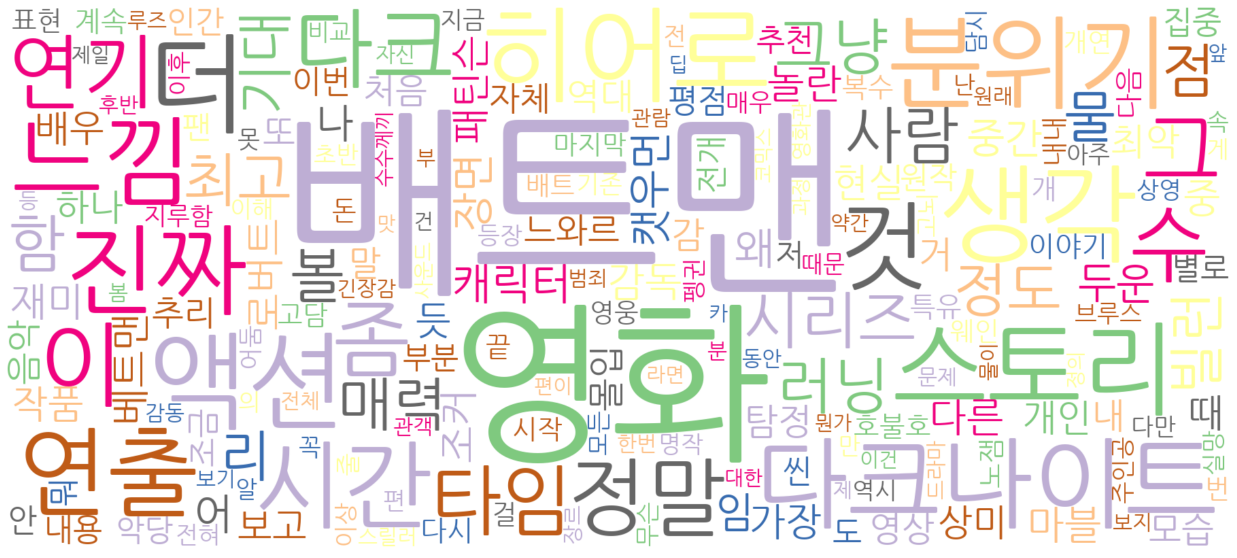

In [15]:
################### 결과 예시 ################### 

## 6. 특정 조건을 만족한 데이터만 추출해보기.

In [ ]:
# 영화 평점이 10점인 영화 리뷰만 추출해보기

#영화 평점이 10점인 데이터 프레임을 df_10에 저장해주세요.


In [40]:
df[df['영화 평점'] == 10]

,영화 리뷰,영화 평점
4,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
5,로버트 패틴슨..배트맨에 완전 잘 어울림,10
9,코믹스 팬이면 무한감동,10
12,부족한 부분을 가장 인간적인 모습으로 만회하는 신선한 베트맨과 진짜 지능형 악당의 ...,10
13,나름 괜찮게 관람했습니다,10
...,...,...
2832,기존 배트맨은 오픈 거실에서 촬영한 인싸 배트맨이 라면 ‘더 배트맨’은 깊고 은밀한...,10
2840,개인적으로 지루하지않았습니다. 여태 봐왔던 배트맨과 달리 장르가 좀 바뀌였을뿐 .....,10
2842,크...배트맨 골수 팬으로 재밋네요 갠적으로 조커같은 영화보다 훨씬 재미져요!!! ...,10
2844,"D.C의 부활, 이 영화는 미술적으로 존중받아야 마땅하다",10


In [42]:
df1 = df.copy()

In [49]:
df[df['영화 평점'] == 10]

,영화 리뷰,영화 평점
4,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
5,로버트 패틴슨..배트맨에 완전 잘 어울림,10
9,코믹스 팬이면 무한감동,10
12,부족한 부분을 가장 인간적인 모습으로 만회하는 신선한 베트맨과 진짜 지능형 악당의 ...,10
13,나름 괜찮게 관람했습니다,10
...,...,...
2832,기존 배트맨은 오픈 거실에서 촬영한 인싸 배트맨이 라면 ‘더 배트맨’은 깊고 은밀한...,10
2840,개인적으로 지루하지않았습니다. 여태 봐왔던 배트맨과 달리 장르가 좀 바뀌였을뿐 .....,10
2842,크...배트맨 골수 팬으로 재밋네요 갠적으로 조커같은 영화보다 훨씬 재미져요!!! ...,10
2844,"D.C의 부활, 이 영화는 미술적으로 존중받아야 마땅하다",10


In [58]:
df_10 = df[df['영화 평점']==10]

In [59]:
df_10

,영화 리뷰,영화 평점
4,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
5,로버트 패틴슨..배트맨에 완전 잘 어울림,10
9,코믹스 팬이면 무한감동,10
12,부족한 부분을 가장 인간적인 모습으로 만회하는 신선한 베트맨과 진짜 지능형 악당의 ...,10
13,나름 괜찮게 관람했습니다,10
...,...,...
2832,기존 배트맨은 오픈 거실에서 촬영한 인싸 배트맨이 라면 ‘더 배트맨’은 깊고 은밀한...,10
2840,개인적으로 지루하지않았습니다. 여태 봐왔던 배트맨과 달리 장르가 좀 바뀌였을뿐 .....,10
2842,크...배트맨 골수 팬으로 재밋네요 갠적으로 조커같은 영화보다 훨씬 재미져요!!! ...,10
2844,"D.C의 부활, 이 영화는 미술적으로 존중받아야 마땅하다",10


In [23]:
################### 결과 예시 ################### 

,영화 리뷰,영화 평점
4,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
5,로버트 패틴슨..배트맨에 완전 잘 어울림,10
9,코믹스 팬이면 무한감동,10
12,부족한 부분을 가장 인간적인 모습으로 만회하는 신선한 베트맨과 진짜 지능형 악당의 ...,10
13,나름 괜찮게 관람했습니다,10
...,...,...
2832,기존 배트맨은 오픈 거실에서 촬영한 인싸 배트맨이 라면 ‘더 배트맨’은 깊고 은밀한...,10
2840,개인적으로 지루하지않았습니다. 여태 봐왔던 배트맨과 달리 장르가 좀 바뀌였을뿐 .....,10
2842,크...배트맨 골수 팬으로 재밋네요 갠적으로 조커같은 영화보다 훨씬 재미져요!!! ...,10
2844,"D.C의 부활, 이 영화는 미술적으로 존중받아야 마땅하다",10


In [60]:
## df_10의 인덱스를 재설정해주세요.
df_10.reset_index(inplace=True, drop=True)

In [61]:
df_10

,영화 리뷰,영화 평점
0,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
1,로버트 패틴슨..배트맨에 완전 잘 어울림,10
2,코믹스 팬이면 무한감동,10
3,부족한 부분을 가장 인간적인 모습으로 만회하는 신선한 베트맨과 진짜 지능형 악당의 ...,10
4,나름 괜찮게 관람했습니다,10
...,...,...
1041,기존 배트맨은 오픈 거실에서 촬영한 인싸 배트맨이 라면 ‘더 배트맨’은 깊고 은밀한...,10
1042,개인적으로 지루하지않았습니다. 여태 봐왔던 배트맨과 달리 장르가 좀 바뀌였을뿐 .....,10
1043,크...배트맨 골수 팬으로 재밋네요 갠적으로 조커같은 영화보다 훨씬 재미져요!!! ...,10
1044,"D.C의 부활, 이 영화는 미술적으로 존중받아야 마땅하다",10


In [29]:
################### 결과 예시 ################### 

,영화 리뷰,영화 평점
0,다른건 몰라도 영상미가 정말 뛰어나서 볼 맛이나는 영화였고 스토리도 나쁘지 않았음,10
1,로버트 패틴슨..배트맨에 완전 잘 어울림,10
2,코믹스 팬이면 무한감동,10
3,부족한 부분을 가장 인간적인 모습으로 만회하는 신선한 베트맨과 진짜 지능형 악당의 ...,10
4,나름 괜찮게 관람했습니다,10
...,...,...
1041,기존 배트맨은 오픈 거실에서 촬영한 인싸 배트맨이 라면 ‘더 배트맨’은 깊고 은밀한...,10
1042,개인적으로 지루하지않았습니다. 여태 봐왔던 배트맨과 달리 장르가 좀 바뀌였을뿐 .....,10
1043,크...배트맨 골수 팬으로 재밋네요 갠적으로 조커같은 영화보다 훨씬 재미져요!!! ...,10
1044,"D.C의 부활, 이 영화는 미술적으로 존중받아야 마땅하다",10


In [ ]:
# 앞서 빈도 분석과 동일하게 df_10에서 가장 많이 나온 단어 10개를 추출해주세요.


In [62]:
okt.nouns(df_10['영화 리뷰'].loc[0])

['영상', '미가', '정말', '볼', '맛', '이나', '영화', '스토리']

In [63]:
noun_list2=[]
for i in range(len(df_10)):
    noun_list2.append(okt.nouns(df_10['영화 리뷰'].loc[i]))

In [73]:
noun_list2[:3]

[['영상', '미가', '정말', '볼', '맛', '이나', '영화', '스토리'],
 ['로버트', '패틴슨', '배트맨', '완전', '어울림'],
 ['코믹스', '팬', '무한', '감동']]

In [64]:
total_word2=[]
for i in range(len(noun_list2)):
    for j in range(len(noun_list2[i])):
        total_word2.append(noun_list2[i][j])

In [65]:
total_word2[:10]

['영상', '미가', '정말', '볼', '맛', '이나', '영화', '스토리', '로버트', '패틴슨']

In [66]:
len(total_word2)

10335

In [67]:
import collections
counter2 = collections.Counter(total_word2)
counter2.most_common(10)

[('배트맨', 664),
 ('영화', 397),
 ('히어로', 119),
 ('더', 111),
 ('진짜', 108),
 ('생각', 104),
 ('분위기', 102),
 ('액션', 91),
 ('최고', 91),
 ('정말', 82)]

In [31]:
################### 결과 예시 ################### 

[('배트맨', 664),
 ('영화', 397),
 ('히어로', 119),
 ('더', 111),
 ('진짜', 108),
 ('생각', 104),
 ('분위기', 102),
 ('액션', 91),
 ('최고', 91),
 ('정말', 82)]

In [69]:
# 배트맨과 더를 불용어로 지정하여 제거 한 뒤 다시 10개의 가장 많이 나온 단어를 추출해주세요.
stopwords = ['배트맨','더']

result = []
for words in total_word2:
    if words not in stopwords:
        result.append(words)

In [71]:
len(result)

9560

In [72]:
counter2 = collections.Counter(result)
counter2.most_common(10)

[('영화', 397),
 ('히어로', 119),
 ('진짜', 108),
 ('생각', 104),
 ('분위기', 102),
 ('액션', 91),
 ('최고', 91),
 ('정말', 82),
 ('연출', 81),
 ('연기', 80)]

In [32]:
################### 결과 예시 ################### 

[('영화', 397),
 ('히어로', 119),
 ('진짜', 108),
 ('생각', 104),
 ('분위기', 102),
 ('액션', 91),
 ('최고', 91),
 ('정말', 82),
 ('연출', 81),
 ('연기', 80)]

## 7. 마스크를 활용한 워드클라우드 시각화

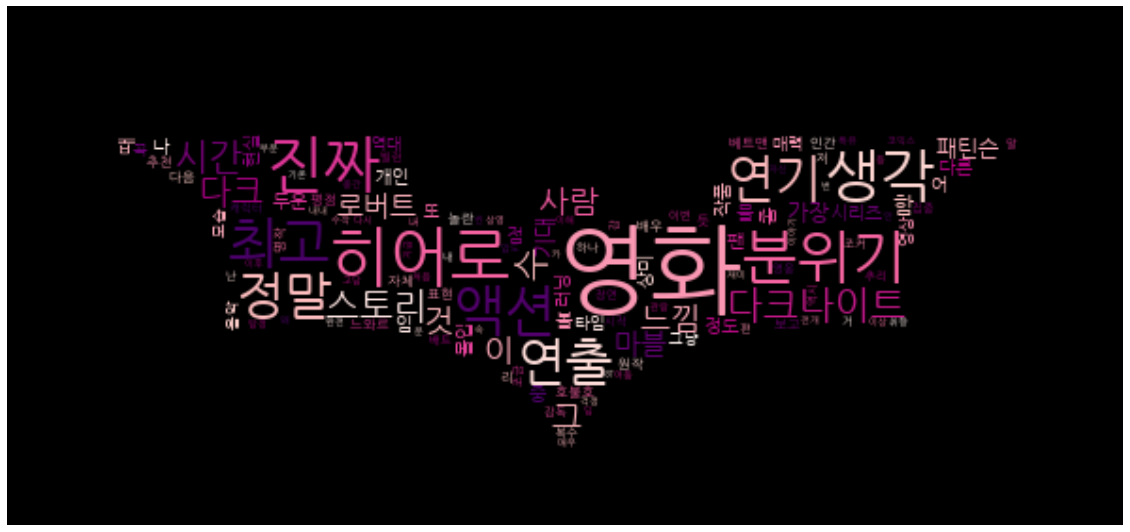

In [50]:
# 다운 받은 마스크중 batman.png 파일을 활용하여 마스크를 씌운 워드클라우드를 시각화해주세요.
from PIL import Image
import numpy as np
img = Image.open('batman.png')
img_array = np.array(img)

wordcloud = WordCloud(
    font_path = "C:/Users/toryc/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf",
    background_color='black',# 배경 색깔 정하기
    colormap = 'RdPu',   # 폰트 색깔 정하기 [위:colormap 참조]
    width = 800,
    height = 800,
    mask=img_array,

)

wordcloud_words = wordcloud.generate_from_frequencies(dict(counter2.most_common()))
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(20, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

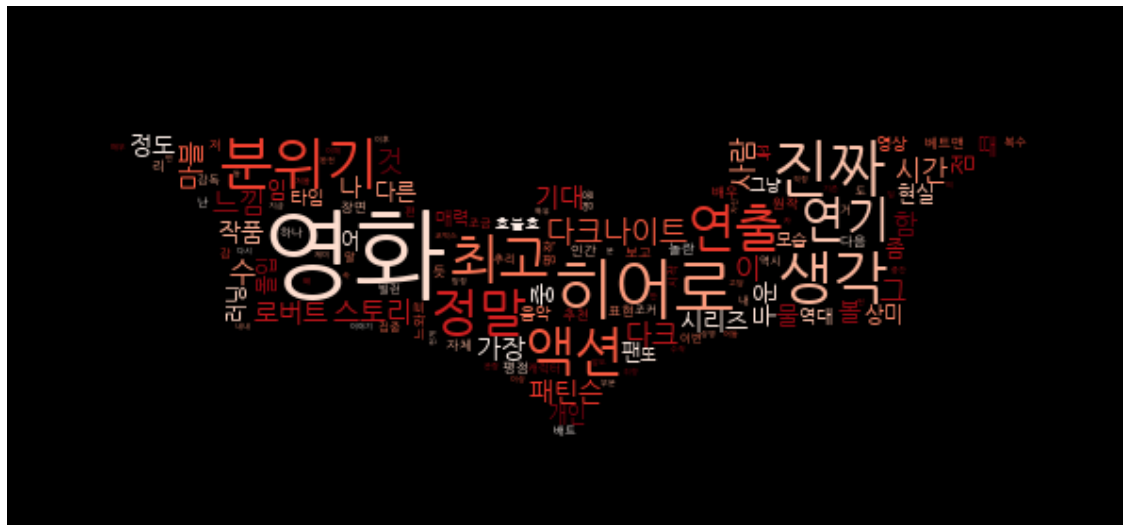

In [33]:
################### 결과 예시 ################### 